## Quiz #0401

### "Optimal number of clusters for K-means clustering"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

#### Answer the following question by providing Python code:

In [2]:
# We will use simulated data.
# 3 clusters in 8 dimensional space.
# Hard to visualize!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 8)

1). Define a function that calculates the "total internal sum of squares".
- X         :   Data.
- centers   :   Array that contains the centroid coordinates. Calculated by kmeans.
- clusters  :   Array of cluster labels. Calculated by kmeans. <br> <br>
HINT: Implement the formula from the lecture note.

In [8]:
def total_internal_ss(X, centers, clusters):

       N_clusters = centers.shape[0]
       N_columns = centers.shape[1]
       N_rows = X.shape[0]
       # <Your code goes in here>
       closest_centers = np.zeros((N_rows, N_columns))
       for n in range(N_clusters):
         indices = (clusters == n)
         for j in range(N_columns):
           closest_centers[indices,j] = centers[n,j] 
       return np.sum((X-closest_centers)**2.0)

2). Visualize as a Scatter plot the "total internal sum of squares" vs N# of clusters. 
- Then, determine the optimal number of clusters.
- Is this number the same as expected?

In [9]:
n_cluster = np.array(range(2,10))                   # Array that contains the number of clusters.
total_ss = np.array([])                             # Array that will contain the total internal sum of squares.
for n in n_cluster:
    kmeans = KMeans(n_clusters=n)
    clusters = kmeans.fit(X).labels_
    centers = kmeans.cluster_centers_
    total_ss = np.append(total_ss, total_internal_ss(X,centers,clusters))
       

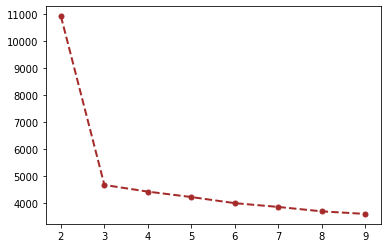

In [13]:
plt.plot(n_cluster,total_ss,color='brown',marker='o',linestyle='dashed',linewidth=2,markersize=5)
plt.show()